# Data Cleaning in Python — Exercise
FARRES AMRHAR

**Course:** Intro to Data Mining  
**Dataset:** Heart Failure Prediction dataset (loaded from a public URL — no file downloads needed!)  

---


# YOUR TURN: Practice Exercise

Now apply the same data cleaning pipeline from the Titanic exercise to a **new dataset**: the **Heart Failure Prediction** dataset.

This dataset combines 5 heart disease databases (918 patients total) and contains medical information about patients and whether or not they have heart disease. It has **text columns that need encoding**, potential outliers, and some tricky data quality issues — perfect for practicing everything we just learned.

**Your tasks** (follow the same steps from above):

1. Load the data and take a first look
2. Understand the data types and structure
3. Get descriptive statistics
4. Check for duplicates
5. Handle missing values (decide: drop column, drop row, or impute?)
6. Encode any categorical (`object`) columns
7. Detect and handle outliers
8. Scale the numerical features

The starter code below loads the dataset for you. The rest is up to you!

> **Hints:** Pay close attention to `.describe()` — not all missing values show up as NaN! Also, this dataset was made by combining multiple hospital databases, so check for duplicates.

### About the Heart Failure Prediction Dataset

| Column | Description | Type |
|--------|-------------|------|
| Age | Age in years | Numerical |
| Sex | M = Male, F = Female | Categorical |
| ChestPainType | TA = Typical Angina, ATA = Atypical Angina, NAP = Non-Anginal Pain, ASY = Asymptomatic | Categorical |
| RestingBP | Resting blood pressure (mm Hg) | Numerical |
| Cholesterol | Serum cholesterol (mg/dl) | Numerical |
| FastingBS | Fasting blood sugar > 120 mg/dl (1 = true, 0 = false) | Numerical |
| RestingECG | Normal, ST = ST-T wave abnormality, LVH = left ventricular hypertrophy | Categorical |
| MaxHR | Maximum heart rate achieved | Numerical |
| ExerciseAngina | Y = Yes, N = No | Categorical |
| Oldpeak | ST depression induced by exercise | Numerical |
| ST_Slope | Up = upsloping, Flat = flat, Down = downsloping | Categorical |
| HeartDisease | 1 = heart disease, 0 = no heart disease (TARGET) | Numerical |

### Step 1: Load the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# The Heart Failure Prediction dataset — loaded from a public GitHub URL
# (Originally from Kaggle, combining 5 UCI heart disease databases)
url = 'https://raw.githubusercontent.com/xpy-10/DataSet/main/heart.csv'

heart = pd.read_csv(url)

print(f'Dataset shape: {heart.shape[0]} rows x {heart.shape[1]} columns')
heart.head()

Dataset shape: 918 rows x 12 columns


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### Step 2: Check data types and structure

Use `.info()` to see the data types and count non-null values.

In [3]:
# YOUR CODE HERE
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### Step 3: Descriptive statistics

Use `.describe()`. Look for anything surprising in the min, max, or mean values.

In [5]:
# YOUR CODE HERE
heart.info()
heart.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### Step 4: Check for duplicates

How many duplicate rows are there? If any, remove them.

In [6]:
# YOUR CODE HERE
heart.duplicated().sum()
heart = heart.drop_duplicates()
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


### Step 5: Handle missing values

Check the percentage of missing values per column. Then decide what to do:
- Drop columns that are mostly missing
- Drop rows if very few are missing
- Impute (fill) with mean or median if a moderate amount is missing

In [7]:
print((heart.isnull().sum() / len(heart)) * 100)
print(f"\\nCholesterol == 0: {(heart['Cholesterol'] == 0).sum()} rows")
heart['Cholesterol'] = heart['Cholesterol'].replace(0, heart[heart['Cholesterol'] != 0]['Cholesterol'].median())

Age               0.0
Sex               0.0
ChestPainType     0.0
RestingBP         0.0
Cholesterol       0.0
FastingBS         0.0
RestingECG        0.0
MaxHR             0.0
ExerciseAngina    0.0
Oldpeak           0.0
ST_Slope          0.0
HeartDisease      0.0
dtype: float64
\nCholesterol == 0: 172 rows


### Step 6: Encode categorical variables

Check if any columns are `object` type. If so, decide whether to use label encoding or one-hot encoding.

Hint: Look at `.info()` output — how many unique values does each `object` column have?

In [8]:

heart['Sex'] = heart['Sex'].map({'M': 0, 'F': 1})
heart['ExerciseAngina'] = heart['ExerciseAngina'].map({'N': 0, 'Y': 1})

heart = pd.get_dummies(heart, columns=['ChestPainType', 'RestingECG', 'ST_Slope'], drop_first=True)
heart.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,40,0,140,289,0,172,0,0.0,0,True,False,False,True,False,False,True
1,49,1,160,180,0,156,0,1.0,1,False,True,False,True,False,True,False
2,37,0,130,283,0,98,0,0.0,0,True,False,False,False,True,False,True
3,48,1,138,214,0,108,1,1.5,1,False,False,False,True,False,True,False
4,54,0,150,195,0,122,0,0.0,0,False,True,False,True,False,False,True


### Step 7: Detect and handle outliers

Pick 2-3 numerical columns (e.g., `trestbps`, `chol`, `thalach`). Create box plots and use the IQR method.

Remember: think about whether outliers are real data or errors before removing them!

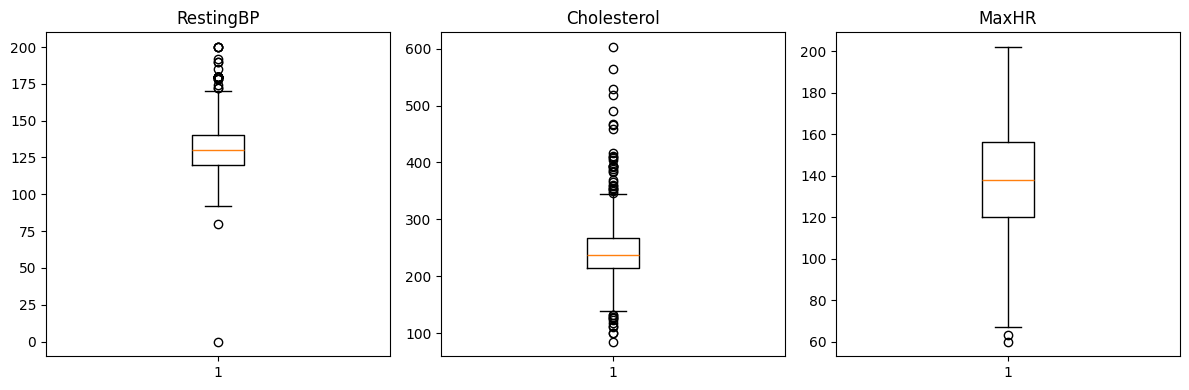

RestingBP: 28 outliers
Cholesterol: 41 outliers
MaxHR: 2 outliers


In [9]:
cols = ['RestingBP', 'Cholesterol', 'MaxHR']

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for i, col in enumerate(cols):
    axes[i].boxplot(heart[col])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

for col in cols:
    Q1, Q3 = heart[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    n = ((heart[col] < Q1 - 1.5 * IQR) | (heart[col] > Q3 + 1.5 * IQR)).sum()
    print(f"{col}: {n} outliers")


### Step 8: Scale the numerical features

Apply Min-Max scaling to the numerical columns (not the target column).

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

num_cols = heart.drop(columns=['HeartDisease']).select_dtypes(include='number').columns
heart[num_cols] = scaler.fit_transform(heart[num_cols])

heart.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,0.244898,0.0,0.70,0.393822,0.0,0.788732,0.0,0.295455,0,True,False,False,True,False,False,True
1,0.428571,1.0,0.80,0.183398,0.0,0.676056,0.0,0.409091,1,False,True,False,True,False,True,False
2,0.183673,0.0,0.65,0.382239,0.0,0.267606,0.0,0.295455,0,True,False,False,False,True,False,True
3,0.408163,1.0,0.69,0.249035,0.0,0.338028,1.0,0.465909,1,False,False,False,True,False,True,False
4,0.530612,0.0,0.75,0.212355,0.0,0.436620,0.0,0.295455,0,False,True,False,True,False,False,True


### Reflection Questions

After completing the exercise, answer these questions (add a text cell or answer here):

1. **How did the Heart Disease dataset compare to the Titanic dataset in terms of data quality?**

The Heart Disease dataset was cleaner overall. The Titanic dataset had more straightforward missing values (Age, Cabin, Embarked) that were easy to spot.

2. **Which missing value strategy did you use, and why?**

We replaced the 0 values in Cholesterol with the median of the non-zero values. We chose the median over the mean because it is better for outliers, which is especially important for medical data where extreme values are common.

3. **Did you find any outliers? Did you remove them? Why or why not?**

Yes, we found outliers in RestingBP, Cholesterol, and MaxHR. We chose to leave them in. Unlike the Titanic dataset where some outliers could be data errors, these are real medical measurements an unusually high blood pressure or heart rate is realistic not a mistake. Removing them could harm findings by discarding meaningful data.

4. **If you were building a model to predict heart disease, which columns do you think would be most important?**

Based on the dataset, ST_Slope, ChestPainType, ExerciseAngina, and Oldpeak, as these directly relate to stress results that doctors use to diagnose heart disease. Age, MaxHR, and Cholesterol would also likely be strong predictors of disease.

---
*Great work! You now have hands-on experience with a complete data cleaning pipeline.* Dr. Thompson